## Introduction

Problem Statement
- Hard to get dream player because it is too expensive like Ronaldo (Phenomenon/ R9), almost 40 Billion EP. 
- Instead of collecting the EP for 40B, I plan to search any player that have same quality like R9, but cheaper price.
- Of course the player will be not good enough, but if we upgrade the player maybe they will have same quality like R9.

Methodology
- get the player id from en.fifaaddict.com
- scrape data from https://en.fifaaddict.com/fo3player.php?id=<player-id>
- clean the data and save it in csv
- calculate the similarity using
    * euclidean distance
    * cosine similarity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn; sn.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity, pairwise_distances
from sklearn.decomposition import PCA

%matplotlib notebook
pd.set_option('display.max_columns', None)

In [3]:
# to remove 'tab' in the data
def StrtoInt(x):
    if '\\t' == x[1:]:
        return int(x[0])
    return int(x)

# grouping the position
def PosDetailToPosGeneral(x):
    if x in ['st','rf','rw','lf','cf','lw']:
        return 'atk'
    elif x in ['cam','cm','lm','cdm','rm']:
        return 'mid'
    elif x in ['cb','lwb','lb','rb','rwb','sw']:
        return 'def'
    else:
        return 'gk'

# grouping the player stats based on position
def PosToStats(x):
    if x == 'cb':
        return ['id','strength', 'sprintspeed', 'jump', 'slidingtackle', 'ballcontrol', 'marking',
               'slidingtackle', 'shortpassing', 'headingaccuracy', 'standingtackle', 'reactions', 'aggression']
    elif x in ['id','rb','lb']:
        return ['id','stamina', 'acceleration', 'sprintspeed', 'slidingtackle', 'ballcontrol', 'marking',
               'slidingtackle', 'crossing', 'shortpassing', 'headingaccuracy', 'standingtackle', 'reactions']
    elif x in ['id','rwb','lwb']:
        return ['id','stamina', 'acceleration', 'sprintspeed', 'slidingtackle', 'dribbling', 'ballcontrol', 'marking',
               'slidingtackle', 'crossing', 'shortpassing', 'standingtackle', 'reactions']
    elif x == 'cdm':
        return ['id','strength', 'stamina', 'slidingtackle', 'ballcontrol', 'marking',
               'slidingtackle','shortpassing', 'longpassing', 'standingtackle', 'vision', 'reactions', 'agression']
    elif x == 'cm':
        return ['id','stamina', 'dribbling', 'ballcontrol', 'tackle', 'shortpassing', 'finishing',
                'longpassing', 'longshots', 'standingtackle', 'positioning', 'vision', 'reactions']
    elif x == 'cam':
        return ['id','acceleration', 'sprintspeed', 'agility', 'dribbling', 'ballcontrol', 'shortpassing', 'finishing',
                'longpassing', 'longshots', 'positioning', 'vision', 'reactions']
    elif x in ['id','rm','lm']:
        return ['id','stamina', 'acceleration', 'sprintspeed', 'dribbling', 'ballcontrol', 'crossing', 
                'shortpassing', 'finishing', 'longpassing', 'positioning', 'vision', 'reactions']
    elif x in ['id','rw','lw']:
        return ['id','acceleration', 'sprintspeed', 'agility', 'dribbling', 'ballcontrol', 'crossing', 
                'shortpassing', 'finishing', 'longshots', 'positioning', 'vision', 'reactions']
    elif x in ['id','rf','lf','cf']:
        return ['id','acceleration', 'sprintspeed', 'dribbling', 'ballcontrol', 'shortpassing', 
                'finishing','shotpower', 'headingaccuracy', 'longshots', 'positioning', 'vision', 'reactions']
    elif x == 'st':
        return ['id','strength', 'acceleration', 'sprintspeed', 'dribbling', 'ballcontrol', 'shortpassing', 
                'finishing','shotpower', 'headingaccuracy', 'longshots', 'volleys',
                'positioning', 'reactions']
    else:
        return ['id','gkdiving', 'gkhandling', 'gkpositioning', 'gkreflexes', 'reactions', 'gkkicking']

In [4]:
df = pd.read_csv('player-full-data-13022018-0000.csv')

In [5]:
# player stats
stats_column = ['id','finishing', 'gkhandling', 'gkpositioning', 'gkreflexes', 'reactions',
       'gkkicking', 'shotpower', 'curve', 'longshots', 'volleys',
       'freekickaccuracy', 'penalties', 'headingaccuracy', 'positioning',
       'sprintspeed', 'acceleration', 'agility', 'jumping', 'stamina',
       'strength', 'balance', 'shortpassing', 'longpassing', 'crossing',
       'ballcontrol', 'dribbling', 'tacticalawareness', 'vision',
       'standingtackle', 'slidingtackle', 'marking', 'aggression', 'poten',
       'left', 'right', 'left_ok', 'right_ok', 'skill_moves']

In [6]:
# this is the id for player that you want to search
player_id = 93001025

## Find similarity based on their position

In [7]:
# get the position for the player searched
pos = df[df['id'] == player_id]['position'].values[0]

# get the variables/columns based on the position
df_similarity = df[PosToStats(pos)]
df_similarity = df_similarity.set_index('id')
df_similarity.dropna(inplace=True)

# normalize the value in each player
df_similarity2 = df_similarity.div(df_similarity.max(axis=1), axis=0)

# calculate the similarity
result_euc = euclidean_distances(df_similarity2)
result_cos = cosine_similarity(df_similarity2)

euc = pd.DataFrame(result_euc)
cos = pd.DataFrame(result_cos)

euc = euc.set_index(df['id'])
cos = cos.set_index(df['id'])

euc.columns= euc.index
cos.columns= cos.index

In [8]:
temp = euc[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,0.000000
8826,24001025,Rui Costa,cam,0.048324
428,63005589,Luis Figo,rw,0.057018
8827,22001025,Rui Costa,cam,0.062119
7338,93214100,Ruud Gullit,cm,0.063712
1342,69193897,Jano Ananidze,cam,0.077076
8867,24214100,Ruud Gullit,cm,0.077406
5501,77199767,Marco van Ginkel,cm,0.078166
7449,88184200,Marko Arnautovic,lm,0.081966
9120,24187961,Paulinho,cm,0.083197


In [9]:
temp = cos[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id, ascending=False).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,1.000000
8826,24001025,Rui Costa,cam,0.999901
428,63005589,Luis Figo,rw,0.999854
8827,22001025,Rui Costa,cam,0.999852
8867,24214100,Ruud Gullit,cm,0.999845
7338,93214100,Ruud Gullit,cm,0.999830
1342,69193897,Jano Ananidze,cam,0.999766
5501,77199767,Marco van Ginkel,cm,0.999745
7367,93166124,Gheorghe Hagi,cam,0.999736
7449,88184200,Marko Arnautovic,lm,0.999693


## Find similarity based on overall stats

In [10]:
df_similarity = df[stats_column]
df_similarity = df_similarity.set_index('id')
df_similarity.dropna(inplace=True)
df_similarity2 = df_similarity.div(df_similarity.max(axis=1), axis=0)

result_euc = euclidean_distances(df_similarity2)
result_cos = cosine_similarity(df_similarity2)

euc = pd.DataFrame(result_euc)
cos = pd.DataFrame(result_cos)

euc = euc.set_index(df['id'])
cos = cos.set_index(df['id'])

euc.columns= euc.index
cos.columns= cos.index

In [11]:
temp = euc[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,0.000000
8826,24001025,Rui Costa,cam,0.124369
437,63001025,Rui Costa,cam,0.227990
8827,22001025,Rui Costa,cam,0.293564
7367,93166124,Gheorghe Hagi,cam,0.323148
8704,24156368,Mauricio Molina,lf,0.337333
5852,77192985,Kevin De Bruyne,rm,0.386612
8573,22166124,Gheorghe Hagi,cam,0.391961
7323,93001605,Robert Pires,rm,0.394304
3513,47191180,Javier Pastore,cam,0.396580


In [12]:
temp = cos[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id, ascending=False).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,1.000000
8826,24001025,Rui Costa,cam,0.999677
437,63001025,Rui Costa,cam,0.999258
8827,22001025,Rui Costa,cam,0.998095
8704,24156368,Mauricio Molina,lf,0.997719
7367,93166124,Gheorghe Hagi,cam,0.997688
3513,47191180,Javier Pastore,cam,0.997174
2414,67121944,Bastian Schweinsteiger,rm,0.996835
2278,47163925,Alessandro Diamanti,cf,0.996765
5852,77192985,Kevin De Bruyne,rm,0.996763


## Find similarity based on their ~(position)

In [13]:
pos = df[df['id'] == player_id]['position'].values[0]
df_similarity = df[['id'] + list(set(stats_column) - set(PosToStats(pos)))]
df_similarity = df_similarity.set_index('id')
df_similarity.dropna(inplace=True)
df_similarity2 = df_similarity.div(df_similarity.max(axis=1), axis=0)

result_euc = euclidean_distances(df_similarity2)
result_cos = cosine_similarity(df_similarity2)

euc = pd.DataFrame(result_euc)
cos = pd.DataFrame(result_cos)

euc = euc.set_index(df['id'])
cos = cos.set_index(df['id'])

euc.columns= euc.index
cos.columns= cos.index

In [14]:
temp = euc[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,0.000000
8826,24001025,Rui Costa,cam,0.106435
437,63001025,Rui Costa,cam,0.170070
8827,22001025,Rui Costa,cam,0.284926
3513,47191180,Javier Pastore,cam,0.305138
8704,24156368,Mauricio Molina,lf,0.310979
7367,93166124,Gheorghe Hagi,cam,0.314434
1563,10191180,Javier Pastore,cam,0.322133
2414,67121944,Bastian Schweinsteiger,rm,0.324218
4027,7167963,Anderson,cam,0.327706


In [15]:
temp = cos[player_id].sort_values(ascending=False)
temp = pd.DataFrame(temp)

pd.merge(df[['id','name','position']],temp, how='outer',left_on="id" , right_index= True).sort_values(by=player_id, ascending=False).head(20)

,id,name,position,93001025
7389,93001025,Rui Costa,cam,1.000000
8826,24001025,Rui Costa,cam,0.999530
437,63001025,Rui Costa,cam,0.999036
2414,67121944,Bastian Schweinsteiger,rm,0.996860
8827,22001025,Rui Costa,cam,0.996630
8704,24156368,Mauricio Molina,lf,0.996491
3513,47191180,Javier Pastore,cam,0.996253
4027,7167963,Anderson,cam,0.996055
7367,93166124,Gheorghe Hagi,cam,0.995939
1563,10191180,Javier Pastore,cam,0.995853


## Visualize the position of the player based on player stats

In [16]:
pca = PCA(svd_solver='randomized', whiten=True, random_state=42, n_components=3)
pca.fit(df_similarity2)
print(pca.explained_variance_)
X = pca.transform(df_similarity2)
y = df['position_cat'].astype('category').cat.codes

[ 0.55203945  0.25092127  0.0459977 ]


<IPython.core.display.Javascript object>


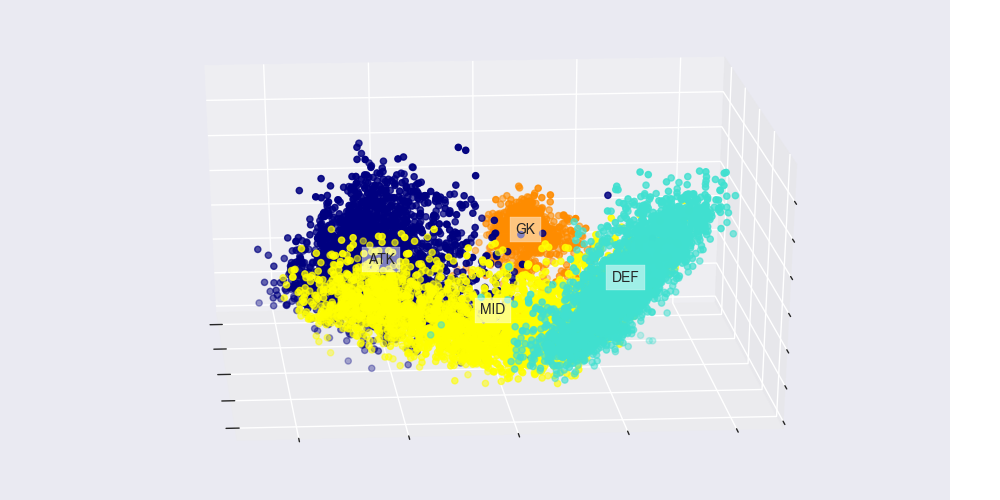

[]

In [17]:
fig = plt.figure(1, figsize=(10, 5))
colors = ['navy', 'turquoise', 'darkorange', 'yellow']
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for color, i, target_name in zip(colors, [0, 1, 2, 3], ['ATK','DEF','GK','MID']):
    ax.text3D(X[y == i, 0].mean(),
              X[y == i, 1].mean(),
              X[y == i, 2].mean(), target_name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2],
                    color=color, lw=1, label=target_name)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])



Based on the graph above, it shows that the player stats is able to distinguih the position between ATK, MID, DEF and GK.